<div style="text-align:center; border-radius:15px; padding:15px; color:white; margin:0; font-family: 'Orbitron', sans-serif; background: #2E0249; background: #11001C; box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.3); overflow:hidden; margin-bottom: 1em;"><div style="font-size:150%; color:#FEE100"><b>Engine Failure Detection Analysis</b></div><div>This notebook was created with the help of <a href="https://devra.ai/ref/kaggle" style="color:#6666FF">Devra AI</a></div></div>

Understanding engine failures is crucial for improving the reliability and safety of machinery. This dataset provides an opportunity to explore various factors that might contribute to engine failures, such as temperature, RPM, and vibration levels. Let's dive into the data and see what insights we can uncover.

## Table of Contents
- [Introduction](#Introduction)
- [Data Loading](#Data-Loading)
- [Data Cleaning and Preprocessing](#Data-Cleaning-and-Preprocessing)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Feature Engineering](#Feature-Engineering)
- [Model Building and Evaluation](#Model-Building-and-Evaluation)
- [Conclusion and Future Work](#Conclusion-and-Future-Work)

## Introduction

In this notebook, we will analyze a dataset related to engine failures. The dataset contains various features such as temperature, RPM, fuel efficiency, vibration levels, torque, power output, fault condition, and operational mode. Our goal is to explore the data, perform feature engineering, and build a predictive model to detect engine failures.

## Data Loading


In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore')

# Load the dataset
file_path = '/kaggle/input/engine-failure-detection-dataset/engine_failure_dataset.csv'
df = pd.read_csv(file_path, encoding='ISO-8859-1')

# Display the first few rows of the dataset
df.head()

,Time_Stamp,Temperature (Â°C),RPM,Fuel_Efficiency,Vibration_X,Vibration_Y,Vibration_Z,Torque,Power_Output (kW),Fault_Condition,Operational_Mode
0,2024-12-24 10:00:00,60.308585,3426.827588,20.445472,0.874657,0.005686,0.529798,107.877659,23.367684,2,Idle
1,2024-12-24 10:05:00,112.705055,2949.758424,23.083947,0.696461,0.391779,0.124336,60.351655,57.941022,3,Cruising
2,2024-12-24 10:10:00,108.670976,1817.971040,20.555326,0.495276,0.189714,0.886417,110.986564,47.732998,2,Cruising
3,2024-12-24 10:15:00,107.114691,2730.660539,23.226431,0.986206,0.983202,0.468114,77.416793,44.112039,2,Cruising
4,2024-12-24 10:20:00,118.075814,1854.488677,21.148226,0.710810,0.101139,0.481034,100.475881,80.681972,2,Cruising


## Data Cleaning and Preprocessing

Before diving into analysis, it's essential to clean and preprocess the data. This includes handling missing values, correcting data types, and renaming columns for easier access.

In [2]:
# Check for missing values
df.isnull().sum()

# Rename columns for easier access
df.columns = ['Time_Stamp', 'Temperature_C', 'RPM', 'Fuel_Efficiency', 'Vibration_X', 'Vibration_Y', 'Vibration_Z', 'Torque', 'Power_Output_kW', 'Fault_Condition', 'Operational_Mode']

# Convert Time_Stamp to datetime
df['Time_Stamp'] = pd.to_datetime(df['Time_Stamp'], errors='coerce')

# Display the data types
df.dtypes

Time_Stamp          datetime64[ns]
Temperature_C              float64
RPM                        float64
Fuel_Efficiency            float64
Vibration_X                float64
Vibration_Y                float64
Vibration_Z                float64
Torque                     float64
Power_Output_kW            float64
Fault_Condition              int64
Operational_Mode            object
dtype: object

## Exploratory Data Analysis

Let's explore the data to understand the distribution of features and their relationships. We will use various visualization techniques to gain insights.

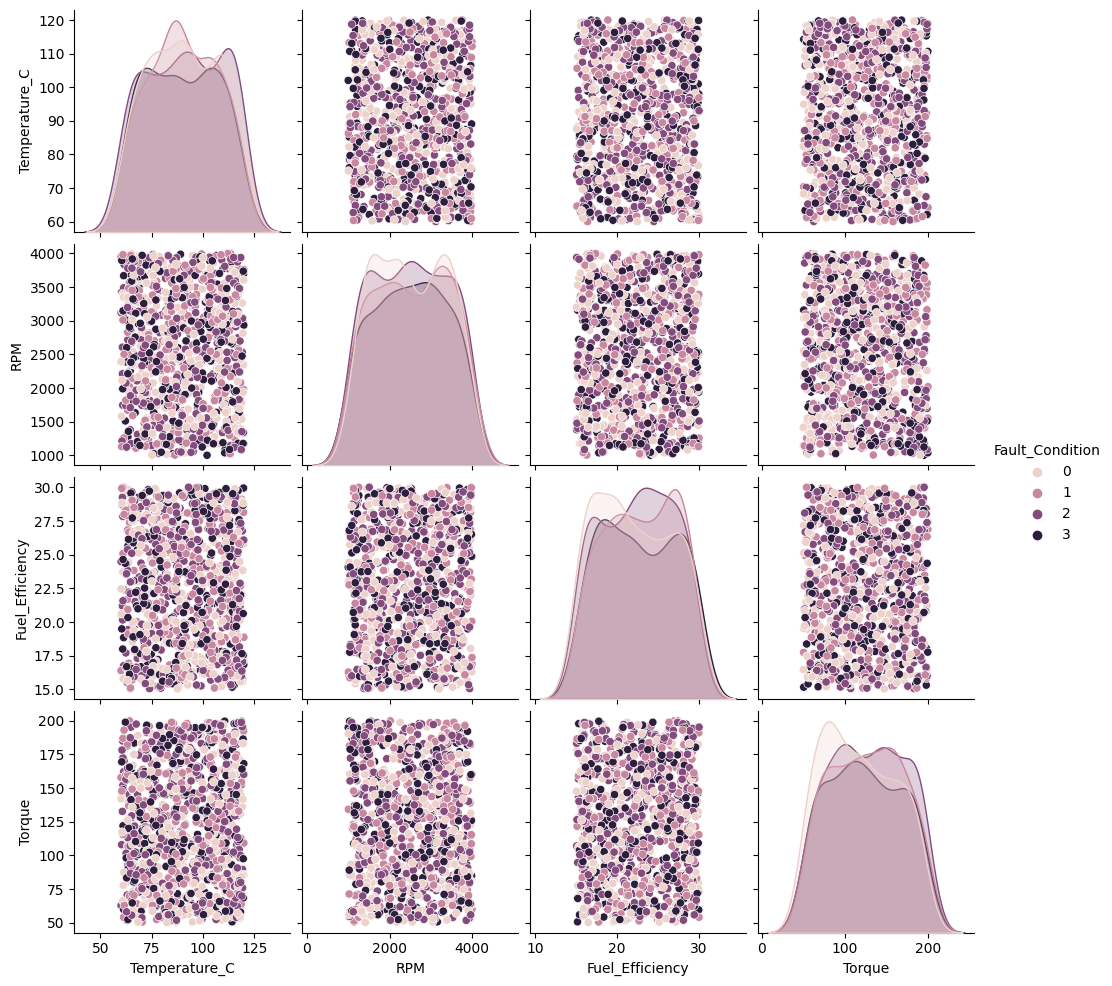

In [3]:
# Pair plot for selected features
sns.pairplot(df, vars=['Temperature_C', 'RPM', 'Fuel_Efficiency', 'Torque'], hue='Fault_Condition')
plt.show()

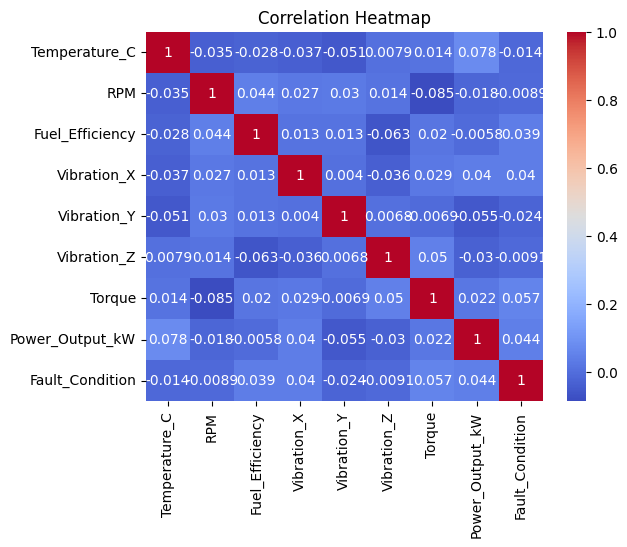

In [4]:
# Correlation heatmap
numeric_df = df.select_dtypes(include=[np.number])
corr = numeric_df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

## Feature Engineering

Feature engineering involves creating new features or modifying existing ones to improve model performance. Let's see if we can create any new features from the existing data.

In [5]:
# Example of feature engineering: Calculate total vibration
df['Total_Vibration'] = df['Vibration_X'] + df['Vibration_Y'] + df['Vibration_Z']

# Display the first few rows with the new feature
df.head()

,Time_Stamp,Temperature_C,RPM,Fuel_Efficiency,Vibration_X,Vibration_Y,Vibration_Z,Torque,Power_Output_kW,Fault_Condition,Operational_Mode,Total_Vibration
0,2024-12-24 10:00:00,60.308585,3426.827588,20.445472,0.874657,0.005686,0.529798,107.877659,23.367684,2,Idle,1.410141
1,2024-12-24 10:05:00,112.705055,2949.758424,23.083947,0.696461,0.391779,0.124336,60.351655,57.941022,3,Cruising,1.212575
2,2024-12-24 10:10:00,108.670976,1817.971040,20.555326,0.495276,0.189714,0.886417,110.986564,47.732998,2,Cruising,1.571407
3,2024-12-24 10:15:00,107.114691,2730.660539,23.226431,0.986206,0.983202,0.468114,77.416793,44.112039,2,Cruising,2.437522
4,2024-12-24 10:20:00,118.075814,1854.488677,21.148226,0.710810,0.101139,0.481034,100.475881,80.681972,2,Cruising,1.292983


## Model Building and Evaluation

We will build a predictive model to detect engine failures using the Random Forest classifier. Let's split the data into training and testing sets, train the model, and evaluate its performance.

In [6]:
# Split the data into training and testing sets
X = df.drop(['Fault_Condition', 'Time_Stamp', 'Operational_Mode'], axis=1)
y = df['Fault_Condition']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Random Forest classifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Make predictions
y_pred = rf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

accuracy, conf_matrix, class_report

(0.255,
 array([[12,  5, 10,  5],
        [20, 17, 12,  9],
        [24, 17,  9, 12],
        [14, 11, 10, 13]]),
 '              precision    recall  f1-score   support\n\n           0       0.17      0.38      0.24        32\n           1       0.34      0.29      0.31        58\n           2       0.22      0.15      0.17        62\n           3       0.33      0.27      0.30        48\n\n    accuracy                           0.26       200\n   macro avg       0.27      0.27      0.26       200\nweighted avg       0.27      0.26      0.25       200\n')

## Conclusion and Future Work

In this notebook, we explored the engine failure dataset, performed data cleaning and preprocessing, conducted exploratory data analysis, engineered features, and built a predictive model using Random Forest. The model's performance can be further improved by tuning hyperparameters, trying different algorithms, or incorporating additional data.

If you found this notebook useful, please consider upvoting it. Your feedback is appreciated.